# **Project Name**    - DEEP CSAT - E-COMMERCE

##### **Project Type**    -  Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Thirumalai Vaasan Raghunathan

# **Project Summary -**

This project focuses on predicting Customer Satisfaction (CSAT) scores using Deep Learning Artificial Neural Networks (ANN). In the context of e-commerce, understanding customer satisfaction through their interactions and feedback is crucial for enhancing service quality, customer retention, and overall business growth. By leveraging advanced neural network models, we aim to accurately forecast CSAT scores based on a myriad of interaction-related features, providing actionable insights for service improvement.

Customer satisfaction in the e-commerce sector is a pivotal metric that influences loyalty, repeat business, and word-of-mouth marketing. Traditionally, companies have relied on direct surveys to gauge customer satisfaction, which can be time-consuming and may not always capture the full spectrum of customer experiences. With the advent of deep learning, it's now possible to predict customer satisfaction scores in real-time, offering a granular view of service performance and identifying areas for immediate improvement.

# **Problem Statement**


**The project aims on predicting Customer Satisfaction score using Deep Learning models based on certain parameters.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [255]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [256]:
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [257]:
# Load Dataset
csat_df = pd.read_csv('eCommerce_Customer_support_data.csv')

### Dataset First View

In [258]:
# Dataset First Look
csat_df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [259]:
# Dataset Rows & Columns count
csat_df.shape

(85907, 20)

### Dataset Information

In [260]:
# Dataset Info
csat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [261]:
# Dataset Duplicate Value Count
csat_df.duplicated().sum()

0

#### Missing Values/Null Values

In [262]:
# Missing Values/Null Values Count
csat_df.isna().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

In [263]:
# Percentage of missing values
perc = []
for x in csat_df.isna().sum():
    perc.append(round(x*100/len(csat_df),3))
df_perc = pd.DataFrame({"Columns":list(csat_df.columns),"Percentage of missing values":perc})
df_perc

,Columns,Percentage of missing values
0,Unique id,0.000
1,channel_name,0.000
2,category,0.000
3,Sub-category,0.000
4,Customer Remarks,66.543
5,Order_id,21.223
6,order_date_time,79.962
7,Issue_reported at,0.000
8,issue_responded,0.000
9,Survey_response_Date,0.000


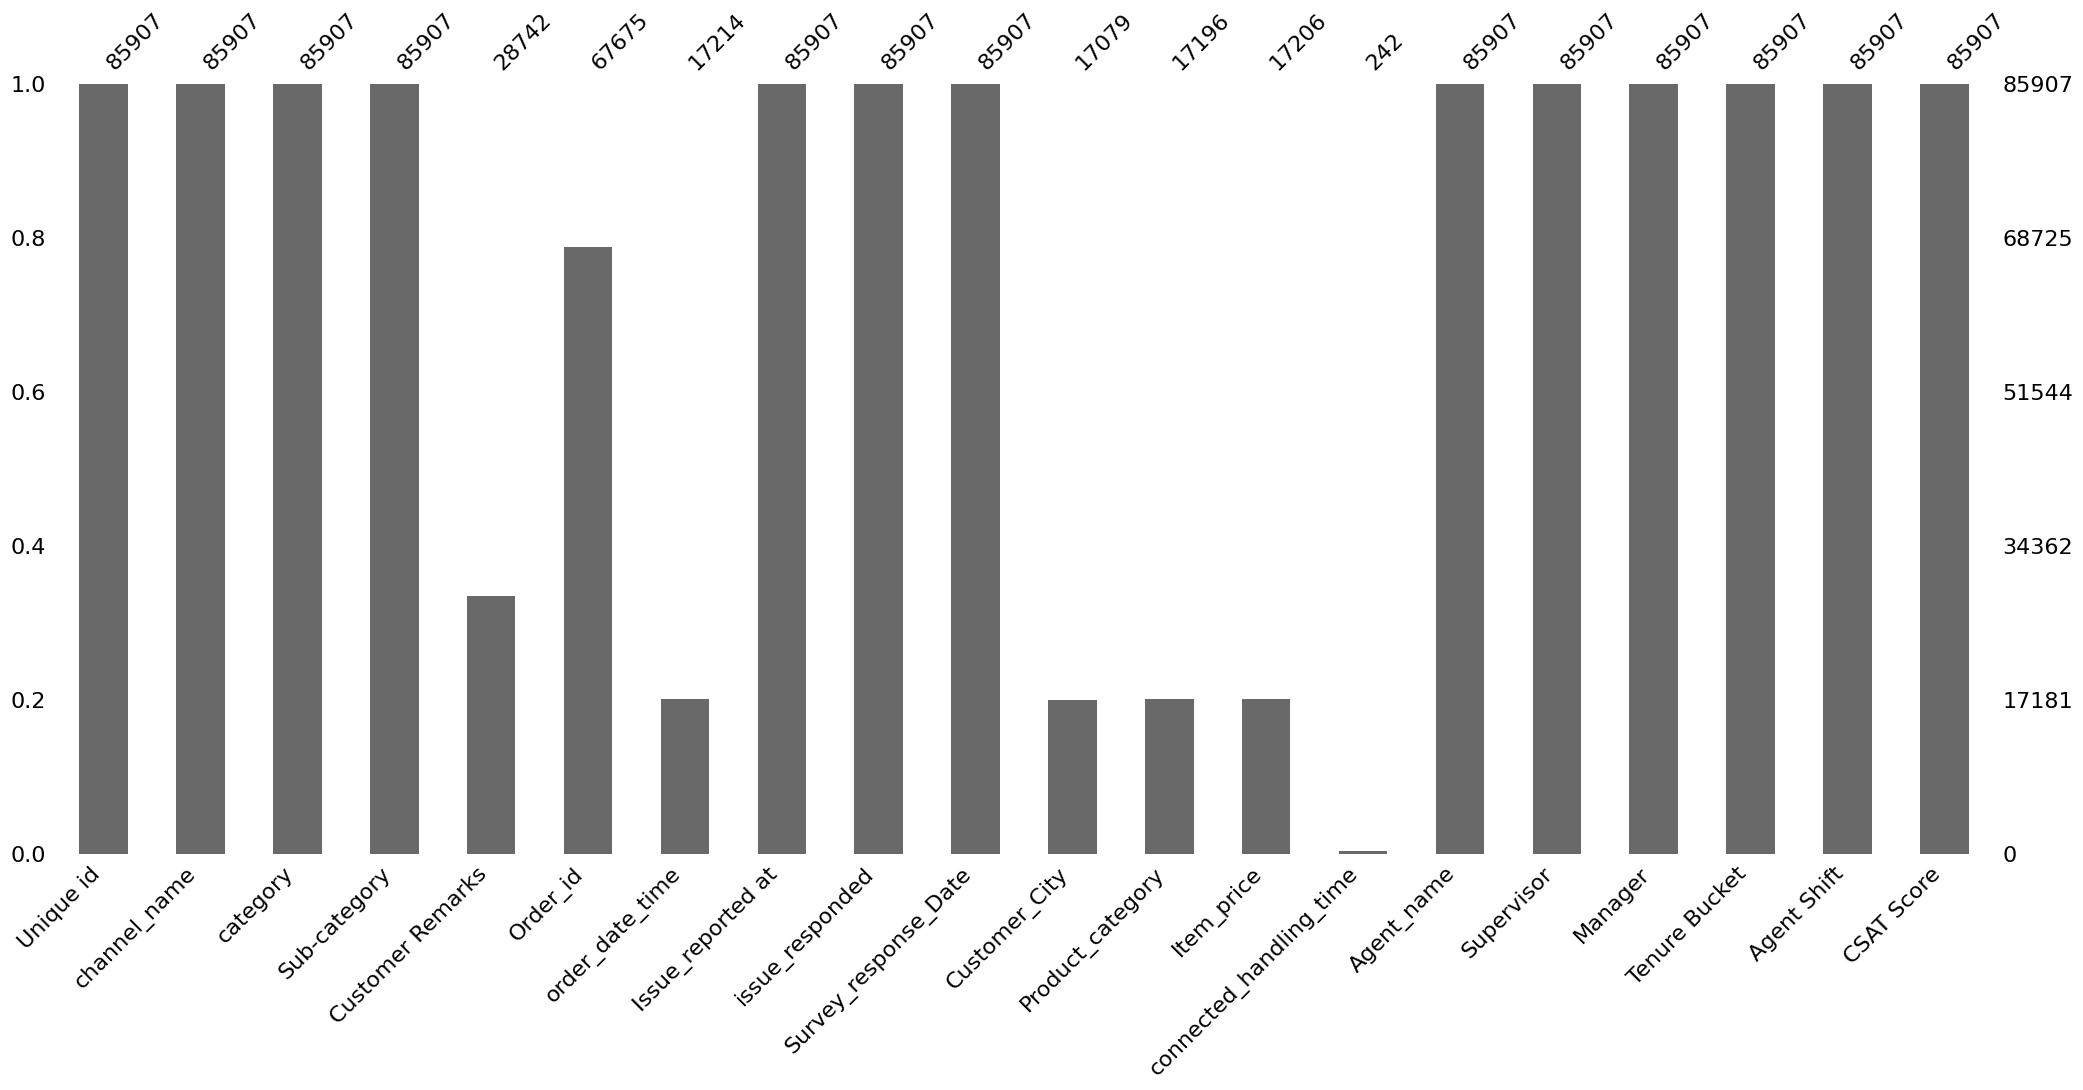

In [264]:
# Visualizing the missing values
import missingno as msno
msno.bar(csat_df)
plt.show()

## ***2. Understanding Your Variables***

In [265]:
# Dataset Columns
csat_df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [266]:
# Dataset Describe
csat_df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


### Variables Description

Unique id: Unique identifier for each record (integer).\
Channel name: Name of the customer service channel (object/string).\
Category: Category of the interaction (object/string).\
Sub-category: Sub-category of the interaction (object/string).\
Customer Remarks: Feedback provided by the customer (object/string).\
Order id: Identifier for the order associated with the interaction (integer).\
Order date time: Date and time of the order (datetime).\
Issue reported at: Timestamp when the issue was reported (datetime).\
Issue responded: Timestamp when the issue was responded to (datetime).\
Survey response date: Date of the customer survey response (datetime).\
Customer city: City of the customer (object/string).\
Product category: Category of the product (object/string).\
Item price: Price of the item (float).\
Connected handling time: Time taken to handle the interaction (float).\
Agent name: Name of the customer service agent (object/string).\
Supervisor: Name of the supervisor (object/string).\
Manager: Name of the manager (object/string).\
Tenure Bucket: Bucket categorizing agent tenure (object/string).\
Agent Shift: Shift timing of the agent (object/string).\
CSAT Score: Customer Satisfaction (CSAT) score (integer).

### Check Unique Values for each variable.

In [267]:
# Check Unique Values for each variable.
for x in csat_df.columns:
    print(f"{x} - {csat_df[x].unique()}")
    print(f"{x} - {csat_df[x].nunique()}")

Unique id - ['7e9ae164-6a8b-4521-a2d4-58f7c9fff13f'
 'b07ec1b0-f376-43b6-86df-ec03da3b2e16'
 '200814dd-27c7-4149-ba2b-bd3af3092880' ...
 '723bce2c-496c-4aa8-a64b-ca17004528f0'
 '707528ee-6873-4192-bfa9-a491f1c08ab5'
 '07c7a878-0d5a-42e0-97ef-de59abec0238']
Unique id - 85907
channel_name - ['Outcall' 'Inbound' 'Email']
channel_name - 3
category - ['Product Queries' 'Order Related' 'Returns' 'Cancellation'
 'Shopzilla Related' 'Payments related' 'Refund Related' 'Feedback'
 'Offers & Cashback' 'Onboarding related' 'Others' 'App/website']
category - 12
Sub-category - ['Life Insurance' 'Product Specific Information' 'Installation/demo'
 'Reverse Pickup Enquiry' 'Not Needed' 'Fraudulent User'
 'Exchange / Replacement' 'Missing' 'General Enquiry' 'Return request'
 'Delayed' 'Service Centres Related' 'Payment related Queries'
 'Order status enquiry' 'Return cancellation' 'Unable to track'
 'Seller Cancelled Order' 'Wrong' 'Invoice request' 'Priority delivery'
 'Refund Related Issues' 'Signup 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [268]:
# Write your code to make your dataset analysis ready.
csat_df.columns
csat_df.drop(['Unique id','Order_id','order_date_time'],axis=1,inplace=True)

In [269]:
csat_df['Issue_reported at'] = csat_df['Issue_reported at'].apply(lambda x:x.replace('/','-'))

In [270]:
csat_df['issue_responded'] = csat_df['issue_responded'].apply(lambda x:x.replace('/','-'))

In [271]:
csat_df['Issue_reported at'] = pd.to_datetime(csat_df['Issue_reported at'],format='%d-%m-%Y %H:%M')
csat_df['issue_responded'] = pd.to_datetime(csat_df['issue_responded'],format='%d-%m-%Y %H:%M')

In [272]:
csat_df['Service duration'] = (csat_df['issue_responded'] - csat_df['Issue_reported at']).dt.total_seconds()

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

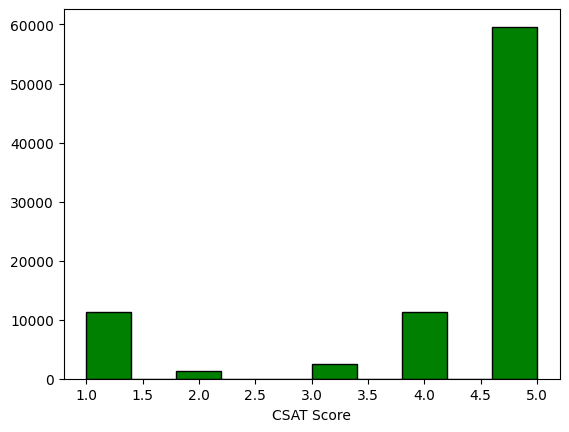

In [273]:
# Chart - 1 visualization code
plt.hist(csat_df['CSAT Score'],color='green',edgecolor='black')
plt.xlabel('CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

To see the distribution of CSAT Score.

##### 2. What is/are the insight(s) found from the chart?

5.0 has the highest number of values and this means that most of the customers are highly satisfied with the services at Shopzilla.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, given that there are high proportion of score 5.0, this indicates that more customers will continue to take services at Shopzilla thereby ensuring positive growth.

#### Chart - 2

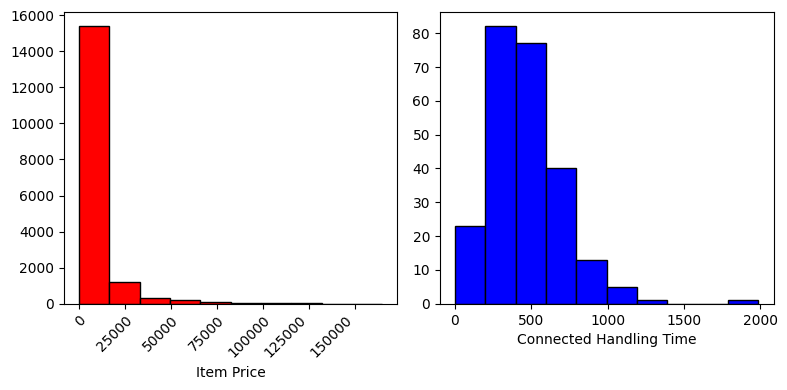

In [274]:
# Chart - 2 visualization code
# Item price and connected handling time 
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].hist(csat_df['Item_price'],color='red',edgecolor='black')
ax[0].set_xlabel('Item Price')
labels = ax[0].get_xticklabels()
plt.setp(labels, rotation=45, ha='right', rotation_mode='anchor')
ax[1].hist(csat_df['connected_handling_time'],color='blue',edgecolor='black')
ax[1].set_xlabel('Connected Handling Time')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To visualize the Distribution of Item Price and Connected Handling Time.

##### 2. What is/are the insight(s) found from the chart?

Item Price and Connected Handling time are right skewed.

#### Chart - 3

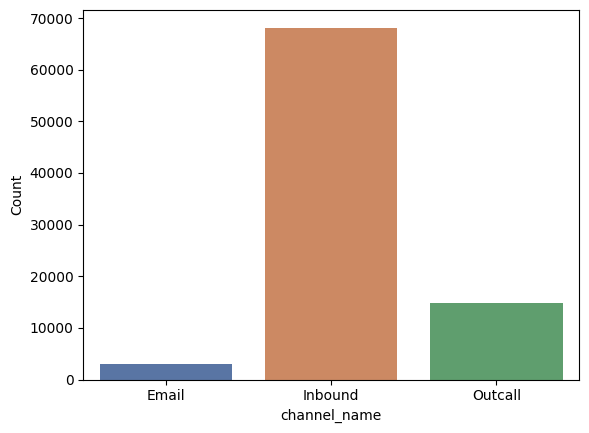

In [275]:
# Chart - 3 visualization code
channel = csat_df.groupby('channel_name').agg(Count=('channel_name','count'))
channel.reset_index(inplace=True)
sns.barplot(channel,x='channel_name',y='Count',hue='channel_name',palette='deep')
plt.show()

##### 1. Why did you pick the specific chart?

To analyze the distribution of Channels.

##### 2. What is/are the insight(s) found from the chart?

Most of the services are Inbound. More than 10000 services are outbound and email services are the least. 

#### Chart - 4

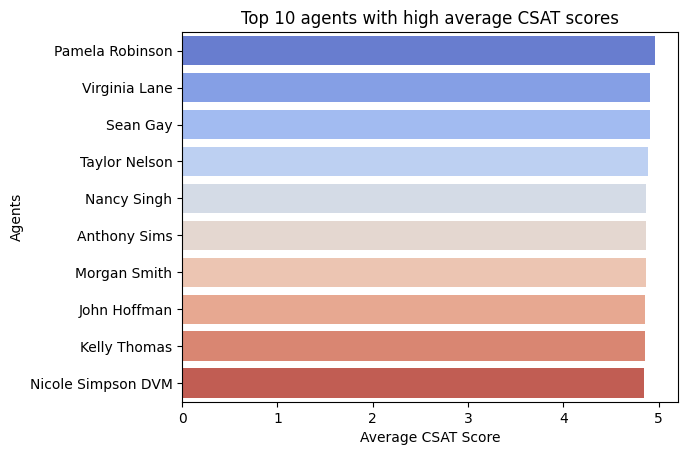

In [276]:
# Chart - 4 visualization code
# top 10 agents with high average CSAT scores
agents_top_10 = csat_df.groupby('Agent_name').agg(Avg_CSAT_Score=('CSAT Score','mean'))
agents_top_10.sort_values(by='Avg_CSAT_Score',ascending=False,inplace=True)
agents_top_10 = agents_top_10[:10]
sns.barplot(agents_top_10,x='Avg_CSAT_Score',y=agents_top_10.index,hue=agents_top_10.index,palette='coolwarm')
plt.xlabel('Average CSAT Score')
plt.ylabel('Agents')
plt.title('Top 10 agents with high average CSAT scores')
plt.show()

##### 1. Why did you pick the specific chart?

To analyse the distribution of the average CSAT scores of top 10 agents.

##### 2. What is/are the insight(s) found from the chart?

It is observed that the top 10 agents have average scores to be above 4.5 (close to 4.8 to 4.9). 

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The top 10 agents have much higher CSAT scores, this means that customers are very much satisfied with their services. This brings in more customers thereby ensuring positive growth of the business.

#### Chart - 5

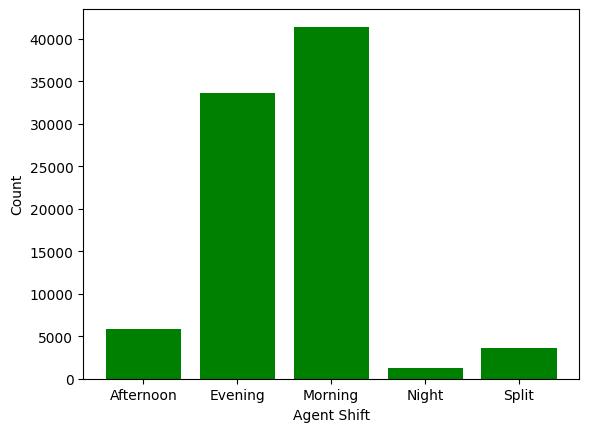

In [277]:
# Chart - 5 visualization code
# Agents shift distribution
agent_shift = csat_df.groupby('Agent Shift').agg(count=('Agent Shift','count'))
plt.bar(agent_shift.index,agent_shift['count'],color='green')
plt.xlabel('Agent Shift')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

To analyze the distribution of Agent Shift.

##### 2. What is/are the insight(s) found from the chart?

Most of the agents work on morning and evening shifts. And it's drastically higher than agents who work on Afternoon, Night and split shifts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

While people may benefit from an immediate to quicker response, if they send their query on morning or evening, the customers may need to wait longer if they send their query on afternoon or night. This may lead to negative growth if there's a delay in response, thereby reducing customer satisfaction score. To ensure positive growth, the number of agents working on morning, afternoon, evening, night and split shifts must be in equal ratio. 

#### Chart - 6

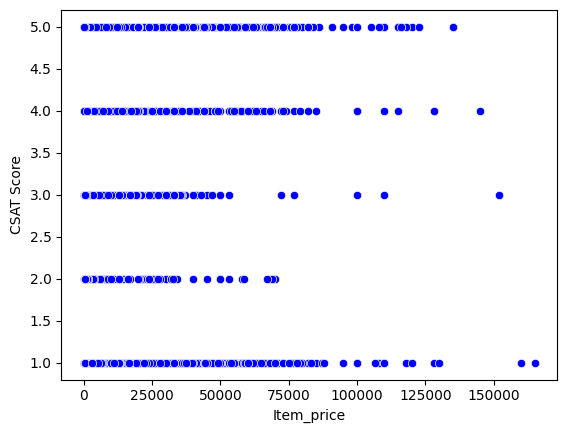

In [278]:
# Chart - 6 visualization code
# Item price vs CSAT score
sns.scatterplot(csat_df,x='Item_price',y='CSAT Score',color='blue')
plt.show()

##### 1. Why did you pick the specific chart?

To compare Item price and CSAT score.

##### 2. What is/are the insight(s) found from the chart?

The CSAT scores of 1,4, and 5 are clustered in the range of 0-100000. Whereas for CSAT scores of 2, and 3, the Item price lies in the range of 0 - 50000. For the highest price, the CSAT score is 1. For higher item prices, the CSAT score is in the range of 1-3.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For CSAT scores 1, and 5, the item scores are evenly distributed in the range of 0 to 150000. This suggests that a positive growth might be ensured.

#### Chart - 7

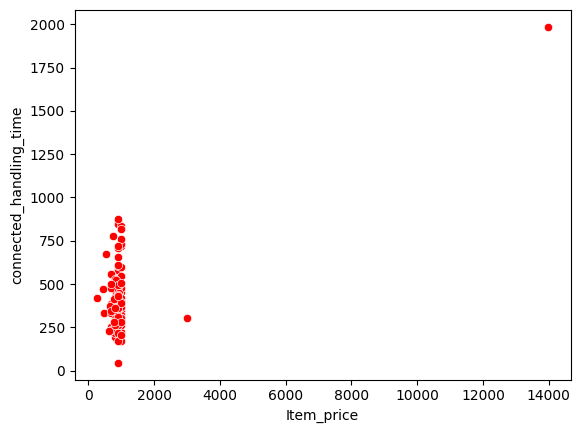

In [279]:
# Chart - 7 visualization code
sns.scatterplot(csat_df,x='Item_price',y='connected_handling_time',color='red')
plt.show()

##### 1. Why did you pick the specific chart?

To compare Item price and connected handling time.

##### 2. What is/are the insight(s) found from the chart?

The values are more clustered where the Item price is in the range of 0-2000 and the connected handling time in the range of 0-1000.

#### Chart - 8

In [280]:
idx = csat_df[csat_df['Service duration']<0].index
for x in idx:
    csat_df.loc[x,'Service duration'] = 0

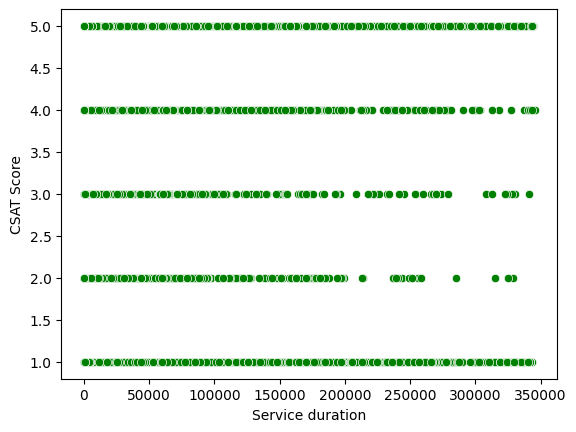

In [281]:
# Chart - 8 visualization code
# Service Duration vs CSAT score
sns.scatterplot(csat_df,x='Service duration',y='CSAT Score',color='green')
plt.show()

##### 1. Why did you pick the specific chart?

To compare service duration and CSAT score.

##### 2. What is/are the insight(s) found from the chart?

The distribution is evenly distributed for CSAT score of 1,4, and 5. 

#### Chart - 9 - Correlation Heatmap

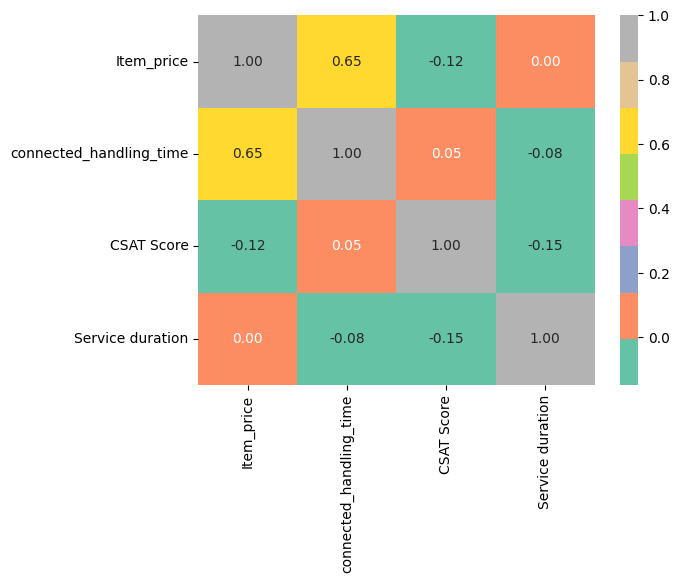

In [282]:
# Correlation Heatmap visualization code
csat_num = csat_df.select_dtypes(include='number')
corr_mat = csat_num.corr()
sns.heatmap(corr_mat,annot=True,fmt='.2f',cmap='Set2')
plt.show()

##### 1. Why did you pick the specific chart?

To compare the correlation between the numerical features.

##### 2. What is/are the insight(s) found from the chart?

There is a fairly strong correlation between Item price and connected handling time. CSAT score is negatively correlated with Item price and service duration.

#### Chart - 15 - Pair Plot

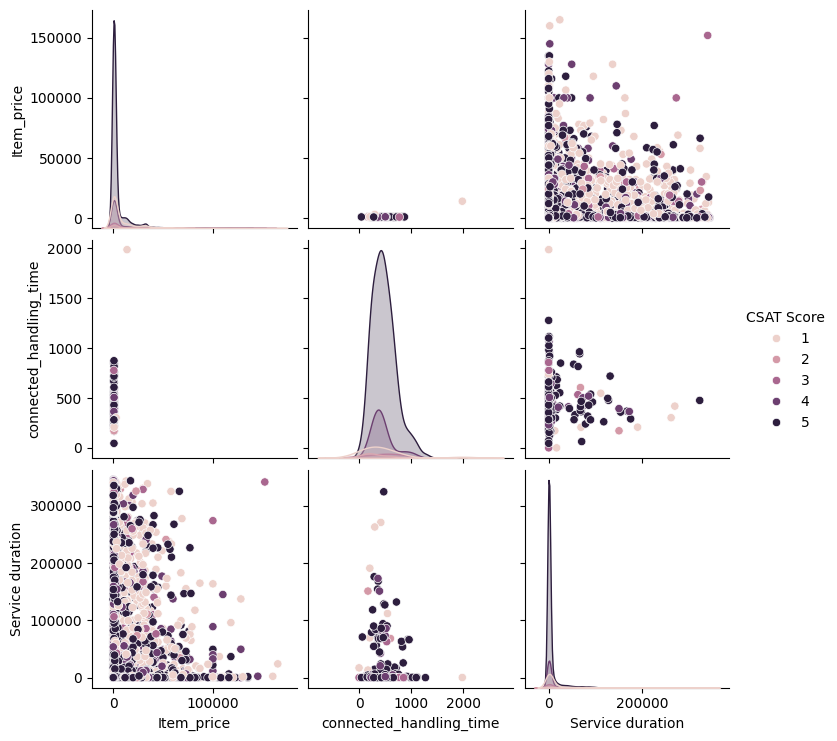

In [283]:
# Pair Plot visualization code
sns.pairplot(csat_num,hue='CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

To compare the numerical features based on CSAT score.

##### 2. What is/are the insight(s) found from the chart?

High peaks are observed for CSAT score = 4. 

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [284]:
# Handling Missing Values & Missing Value Imputation
csat_df.isna().sum()

channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
Service duration               0
dtype: int64

In [285]:
csat_df.drop(['Customer Remarks','connected_handling_time'],axis=1,inplace=True)

In [286]:
csat_df['Customer_City'] = csat_df['Customer_City'].fillna('Unknown')
csat_df['Product_category'] = csat_df['Product_category'].fillna('Unknown')

In [287]:
csat_df['Item_price'] = csat_df['Item_price'].fillna(csat_df['Item_price'].median())

In [288]:
csat_df.drop(['Issue_reported at','issue_responded','Survey_response_Date','Agent_name','Supervisor','Manager'],axis=1,inplace=True)

### 2. Handling Outliers

In [289]:
# Handling Outliers & Outlier treatments
csat_df['item_price_log'] = np.log1p(csat_df['Item_price'])
csat_df['Service duration log'] = np.log1p(csat_df['Service duration'])

In [290]:
csat_df.drop(['Item_price','Service duration'],axis=1,inplace=True)

### 3. Categorical Encoding

In [291]:
# Encode your categorical columns
csat_cat = csat_df.select_dtypes(include='object')
csat_df = pd.get_dummies(csat_df,columns=csat_cat.columns.to_list(),dtype='int')

### 4. Data Scaling

In [309]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
csat_sc = StandardScaler()
X = csat_df.drop('CSAT Score',axis=1)
Y = csat_df['CSAT Score']
X_sc = csat_sc.fit_transform(X.values)
X_sc = pd.DataFrame(X_sc,columns=X.columns)

### 5. Data Splitting

In [311]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_sc,Y,test_size=0.2)

## ***7. DL Model Implementation***

### DL Architecture

In [328]:
import torch
from torch import nn

class CSAT_NN(nn.Module):
    def __init__(self,input_size):
        super(CSAT_NN,self).__init__()
        self.fnn = nn.Sequential(
            nn.Linear(input_size,512),
            nn.Linear(512,256),
            nn.Tanh(),
            nn.Linear(256,128),
            nn.Tanh(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,1),
            nn.ReLU())
        
    def forward(self,X):
        X = self.fnn(X)
        return X

In [329]:
X_train_tens = torch.tensor(X_train.values,dtype=torch.float32)
Y_train_tens = torch.tensor(Y_train.values,dtype=torch.float32)
X_test_tens = torch.tensor(X_test.values,dtype=torch.float32)
Y_test_tens = torch.tensor(Y_test.values,dtype=torch.float32)

In [330]:
Y_train_tens = Y_train_tens.reshape(-1,1)
Y_test_tens = Y_test_tens.reshape(-1,1)

In [331]:
from torch import optim
model = CSAT_NN(X_sc.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)
epochs = 10
for epoch in range(1,epochs+1):
    optimizer.zero_grad()
    output = model(X_train_tens)
    loss = criterion(output,Y_train_tens)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch} - Loss: {loss.item()}")

Epoch 1 - Loss: 19.163936614990234
Epoch 2 - Loss: 18.648771286010742
Epoch 3 - Loss: 18.156736373901367
Epoch 4 - Loss: 17.545236587524414
Epoch 5 - Loss: 16.687654495239258
Epoch 6 - Loss: 15.45064926147461
Epoch 7 - Loss: 13.750650405883789
Epoch 8 - Loss: 11.635236740112305
Epoch 9 - Loss: 9.324736595153809
Epoch 10 - Loss: 7.184761047363281


In [332]:
model.eval()
with torch.no_grad():
    output = model(X_test_tens)
    loss = criterion(output,Y_test_tens)
    print(f"Test loss - {loss.item()}")

Test loss - 5.516192436218262


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***